<a href="https://colab.research.google.com/github/UmitOzteker/TensorFlow-Projects/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow ile Neural Networks Regression





In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Data Oluşturma ve Fit Etme

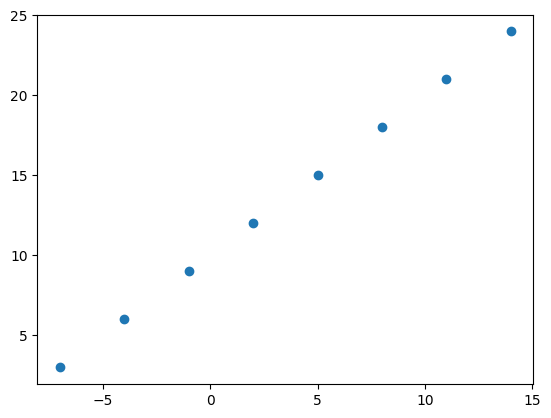

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# X: features/data (inputs)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#y: labels (outputs)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Görselleştirme
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regresyon input ve output şekilleri

In [4]:
# Bir regresyon modelinin örnek girdi ve çıktı şekilleri
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape =y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
# Numpy Arrayleri Tensore dönüştürme
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

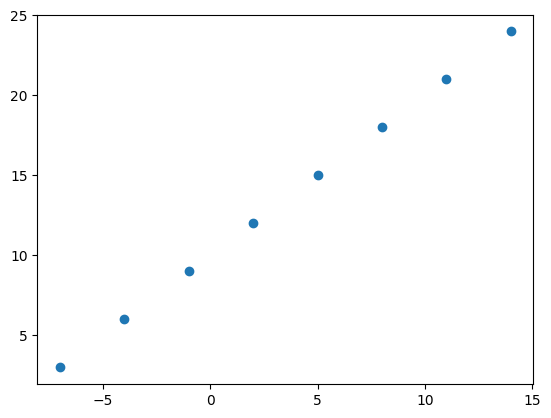

In [9]:
plt.scatter(X, y)

#TensorFlow ile modelleme adımları
TensorFlow'da bir model oluşturmak ve eğitmek için genellikle 3 temel adım vardır.

* Bir model oluşturma - Bir sinir ağının katmanlarını kendiniz bir araya getirin (İşlevsel veya Sıralı API'yi kullanarak) veya önceden oluşturulmuş bir modeli içe aktarın (transfer öğrenimi olarak bilinir).
* Bir modelin derlenmesi - bir model performansının nasıl ölçülmesi gerektiğini (kayıp/metrikler) ve aynı zamanda nasıl iyileştirilmesi gerektiğini (optimizer) tanımlamak.
* Bir modeli fit etmek - modelin verilerdeki kalıpları bulmasına izin vermek (X, y'ye nasıl ulaşır).

In [10]:
tf.random.set_seed(42)

# 1. Sequential API'yi kullanarak bir model oluşturun
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile işlemi
model.compile(loss= tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"]
)

# 3. Modeli fit etme
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 561ms/step - loss: 12.1701 - mae: 12.1701
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 12.0376 - mae: 12.0376
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.9051 - mae: 11.9051
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.7726 - mae: 11.7726
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 11.6401 - mae: 11.6401


**Loss**: Derin öğrenmede kayıp fonksiyonu (loss function), bir sinir ağı modelinin eğitim sürecinde kritik bir rol oynar. Bu fonksiyon, modelin tahminleri (çıktılar) ile gerçek veri değerleri (etiketler) arasındaki farkı ölçer. Eğitimin amacı bu kaybı en aza indirmektir, bu da modelin daha önce görmediği veriler üzerinde daha doğru tahminler yapmasını sağlar.

* MAE: Ortalama Mutlak Hata (Mean Absolute Error) anlamına gelir. Derin öğrenmede bir kayıp fonksiyonu (loss function) olarak kullanılır. Kayıp fonksiyonları, bir modelin ne kadar iyi performans gösterdiğini ölçmek için kullanılır ve eğitim sırasında modelin parametrelerini optimize etmeye yardımcı olur. MAE bir modelin tahminleri ile gerçek değerler arasındaki ortalama mutlak farkı hesaplar. Mutlak fark, iki sayı arasındaki farkın mutlak değeridir. Örneğin, 3 ve 7 arasındaki mutlak fark 4'tür

**Optimizer**: bir sinir ağ modelinin eğitim sürecinde kaybı (loss) en aza indirmek için kullanılan bir algoritmadır. Eğitim sırasında, optimizer modelin parametrelerini iteratif olarak günceller ve her güncellemede kaybın azalmasını sağlar.
Farklı türde optimizer'lar mevcuttur:

1. Stokastik Gradyan İnişi (SGD): En basit optimizer'lardan biridir. Her güncellemede, kaybın eğiminin ters yönünde bir adım atar. SGD, modelin parametrelerini (ağırlık ve önyargılar) iteratif bir şekilde güncelleyerek çalışır. Her güncellemede, aşağıdaki adımları uygular:

* Örnek seç: Bir veri kümesinden rastgele bir örnek veya küçük bir örnek grubu (batch) seçer.
* Model tahmini: Seçilen örnekler üzerinde modelin bir tahmin yapmasını sağlar.
* Kayıp hesaplama: Tahmin edilen değer ile gerçek değer arasındaki kaybı hesaplar.
* Gradyan hesaplama: Kaybın modele göre gradyanını hesaplar. Gradyan, kaybın modelin parametrelerine göre nasıl değiştiğini gösteren bir vektördür.
* Parametre güncelleme: Modelin parametrelerini, gradyanın tersi yönünde öğrenme oranı ile çarpılmış bir miktar kadar günceller. Öğrenme oranı, güncellemelerin ne kadar büyük olacağını kontrol eden bir hiperparametredir.

2. Adam: SGD'nin daha karmaşık bir versiyonudur. Daha hızlı ve daha istikrarlı bir eğitim süreci sağlayabilir.

3. RMSProp: SGD'nin bir başka versiyonudur. Adam'a benzer, ancak daha az bellek kullanır.

**Metrics**: Metrikler, bir modelin performansını değerlendirmek için kullanılan ölçümlerdir.

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Modeli Predict İşlemi
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 91ms/step


array([[9.484437]], dtype=float32)

In [13]:
y_pred + 11

array([[20.484436]], dtype=float32)

# Modeli Geliştirme


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 14.5061 - mae: 14.5061
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.3736 - mae: 14.3736
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2411 - mae: 14.2411
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 14.1086 - mae: 14.1086
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.9761 - mae: 13.9761
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8436 - mae: 13.8436
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7111 - mae: 13.7111
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5786 - mae: 13.5786
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 13.4461 - mae: 13.4461
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3136 - mae: 13.3136
Epoch 11/100
1/1 [==============================]

In [15]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Doğru Cevap = 27
model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[29.920828]], dtype=float32)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 572ms/step - loss: 13.9116 - mae: 13.9116
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4714 - mae: 13.4714
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1182 - mae: 13.1182
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7846 - mae: 12.7846
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4504 - mae: 12.4504
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1056 - mae: 12.1056
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7255 - mae: 11.7255
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2910 - mae: 11.2910
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7891 - mae: 10.7891
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1904 - mae: 10.1904
Epoch 11/100
1/1 [==============================] -

In [18]:
# Doğru Cevap = 27
model.predict([17.0])

1/1 [==============================] - 0s 149ms/step


array([[31.412415]], dtype=float32)

# Modeli Geliştirme 2

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4613 - mae: 13.4613
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.3574 - mae: 13.3574
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2536 - mae: 13.2536
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1497 - mae: 13.1497
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0458 - mae: 13.0458
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9419 - mae: 12.9419
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8380 - mae: 12.8380
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7341 - mae: 12.7341
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6301 - mae: 12.6301
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.5261 - mae: 12.5261
Epoch 11/100
1/1 [==============================] -

In [20]:
# Doğru Cevap 27
model.predict([17.0])

1/1 [==============================] - 0s 194ms/step


array([[30.32457]], dtype=float32)

tf.keras.layers.Dense(100, activation="relu") kodunda 100, yoğun katmandaki nöron sayısını temsil eder. Bu, katmanın 100 farklı nöron içereceği ve her birinin girdi verilerinden gelen sinyalleri işleyip bir çıktı üreteceği anlamına gelir.
* tf.keras.layers.Dense fonksiyonu, Keras'ta yoğun katman oluşturmak için kullanılır.
* İlk parametre, katmandaki nöron sayısını belirtir. Bu durumda, 100 nöron olduğu için katman, 100 boyutlu bir çıktı vektörü üretecektir.
* İkinci parametre, katmanın aktivasyon fonksiyonunu belirtir. "relu", doğrusal olmayan bir aktivasyon fonksiyonudur ve sinyallerin daha karmaşık ilişkileri öğrenmesini sağlar.

Aktivasyon fonksiyonu, yapay sinir ağlarında (YSA) sinyallerin işlenmesini ve modelin karmaşıklığını artırmak için kullanılır. Temel olarak, YSA'daki her nöronun toplama işlemi sonucunda elde ettiği değeri bir sonraki katmana göndermeden önce işlevsel bir hale dönüştürür.

1. Doğrusallık Olmazlık Katmak:

YSA'daki katmanlar arasındaki bağlantılar doğrusaldır. Bu, aktivasyon fonksiyonları kullanılmadan her katmanın bir önceki katmanın doğrusal bir dönüşümü olacağı anlamına gelir. Aktivasyon fonksiyonları, sinyallere doğrusal olmayan bir dönüşüm uygulayarak modelin daha karmaşık ilişkileri öğrenmesini sağlar.

2. Sinyalleri Sınırlamak:

Aktivasyon fonksiyonları, sinyalleri belirli bir aralığa sınırlayabilir. Bu, modelin daha stabil hale gelmesini ve aşırı öğrenmeyi önlemeye yardımcı olur.

Aktivasyon fonksiyonlarının bazı önemli faydaları:

* Doğrusal olmayan modelleri oluşturmayı mümkün kılar.
* Modellerin karmaşıklığını ve öğrenme kapasitesini artırır.
* Aşırı öğrenmeyi önlemeye yardımcı olur.
Sinyalleri normalize etmeye yardımcı olur.

Yaygın olarak kullanılan aktivasyon fonksiyonları:

1. Sigmoid: S-şeklinde bir fonksiyondur ve . genellikle sınıflandırma problemlerinde kullanılır.
2. ReLU: Doğrusal olmayan bir fonksiyondur ve regresyon ve sınıflandırma problemlerinde yaygın olarak kullanılır.
3. Tanh: Hiperbolik tanjant fonksiyonudur ve [-1, 1] aralığında değerler üretir.
4. Softmax: Birden fazla sınıflandırma problemlerinde kullanılır.

# Modeli Değerlendirme

Değerlendirme söz konusu olduğunda şu kelimeleri hatırlamak isteyeceksiniz: "görselleştir, görselleştir, görselleştir."
* Veriler: Hangi verilerle çalışıyorsunuz? Nasıl görünüyor?
* Modelin kendisi: mimari neye benziyor? Farklı şekiller nelerdir?
* Bir modelin eğitimi: Bir model öğrenirken nasıl performans gösterir?
* Bir modelin tahminleri: Bir modelin tahminleri temel gerçeğe (orijinal etiketlere) göre nasıl sıralanır?



In [21]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

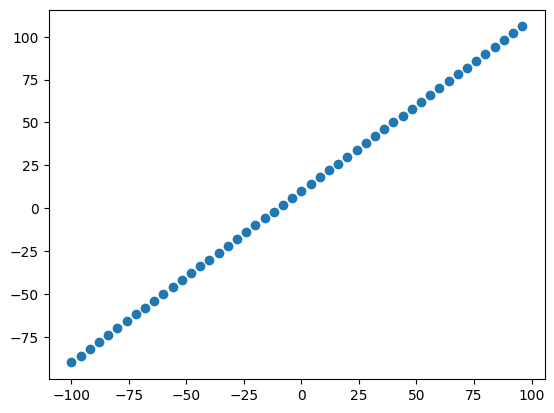

In [23]:
# Datayı görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X, y)

# Verileri Eğitim ve Test Setine Ayırma
Bir makine öğrenimi projesindeki diğer en yaygın ve önemli adımlardan biri, bir eğitim ve test seti (ve gerektiğinde bir doğrulama seti) oluşturmaktır.
* Eğitim seti - model, genellikle mevcut toplam verinin (dönem boyunca çalıştığınız ders materyalleri gibi) %70-80'ini oluşturan bu verilerden öğrenir.
* Doğrulama seti - model, genellikle mevcut toplam verinin %10-15'i olan bu verilere göre ayarlanır (final sınavından önce girdiğiniz deneme sınavı gibi).
* Test seti - model, öğrendiğini test etmek için bu veriler üzerinde değerlendirilir; bu genellikle mevcut toplam verilerin %10-15'idir (dönem sonunda girdiğiniz final sınavı gibi).


In [24]:
# Kaç örneğimiz olduğunu kontrol etme
len(X)

50

In [25]:
# Eğitim ve Test setine bölme
X_train = X[:40] # ilk 40 örnek (verinin %80'i)
y_train = y[:40]

X_test = X[40:] # son 10 örnek (verinin %20'si)
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

### Datayı Görselleştirme

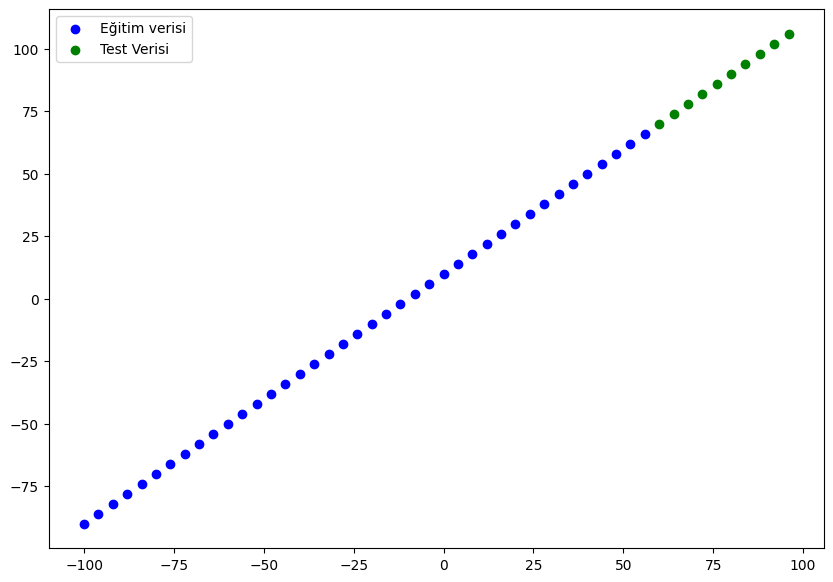

In [26]:
plt.figure(figsize=(10, 7))
# Eğitim Verisi Mavi
plt.scatter(X_train, y_train, c="b", label="Eğitim verisi")

# Test verisi Yeşil
plt.scatter(X_test, y_test, c="g", label="Test Verisi")

plt.legend();

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)

# Modeli Görselleştirme

In [71]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Hata vermesinin sebebi modeli fit etmememiz

In [33]:
X[0], y[0]

TensorShape([50])

In [118]:
# Otomatik build edilen bir model oluşturma
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])


In [94]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=[1])
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [57]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [55]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape = Dense sayısı

Parametre = Shape*2

* Param (Parametre): Makine öğrenmesi modellerinde, param, eğitim süreci boyunca modelin öğrendiği sayısal bir değerdir. Bu değerler, ağdaki nöronlar arasındaki bağlantıları belirler ve ultimately, modelin tahminlerini etkiler.

Bu modelde (sequential_8), dense_12 katmanındaki tek nöronla ilişkilendirilmiş toplam 2 parametre (ağırlık) vardır. Bu ağırlıklar, girdi özelliklerini çıktı nöronuna bağlar ve model, tahmin hatasını en aza indirmek için eğitim sırasında bu ağırlıkları ayarlar.

* Toplam parametreler: modeldeki toplam parametre sayısı.
* Eğitilebilir parametreler: bunlar, modelin eğitilirken güncelleyebileceği parametrelerdir (örüntüler).
* Eğitilemeyen parametreler: bu parametreler eğitim sırasında güncellenmez (bu, transfer öğrenimi sırasında diğer modellerden önceden öğrenilmiş kalıpları getirdiğinizde tipiktir).

In [119]:
# Modeli Eğitme
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 74.9036 - mae: 74.9036
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 74.0264 - mae: 74.0264
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 73.1794 - mae: 73.1794
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 72.3185 - mae: 72.3185
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 71.4734 - mae: 71.4734
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 70.6206 - mae: 70.6206
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 69.7605 - mae: 69.7605
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 68.8678 - mae: 68.8678
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 68.0394 - mae: 68.0394
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 67.2014 - mae: 67.2014
Epoch 11/100
2/2 [==============================] - 0s 11m

Verbose parametresinin üç olası değeri vardır:

0: Hiçbir bilgi görüntülenmez.

1: Eğitim ilerlemesi hakkında bir ilerleme çubuğu görüntülenir.

2: Her çağda eğitim ilerlemesi hakkında ayrıntılı bilgi görüntülenir.

Verbose parametresi, model.fit fonksiyonu tarafından sağlanan bir özelliktir. Bu parametre, eğitim süreci hakkında ne kadar bilgi görüntüleneceğini kontrol eder.

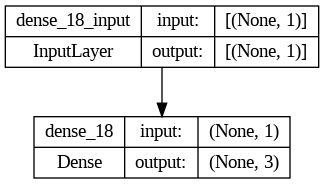

In [63]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

#Model Tahminlerini Görselleştirme

In [120]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 54ms/step


array([[52.364994],
       [55.866104],
       [59.367214],
       [62.86833 ],
       [66.36944 ],
       [69.870544],
       [73.37166 ],
       [76.87277 ],
       [80.373886],
       [83.87499 ]], dtype=float32)

In [121]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [122]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

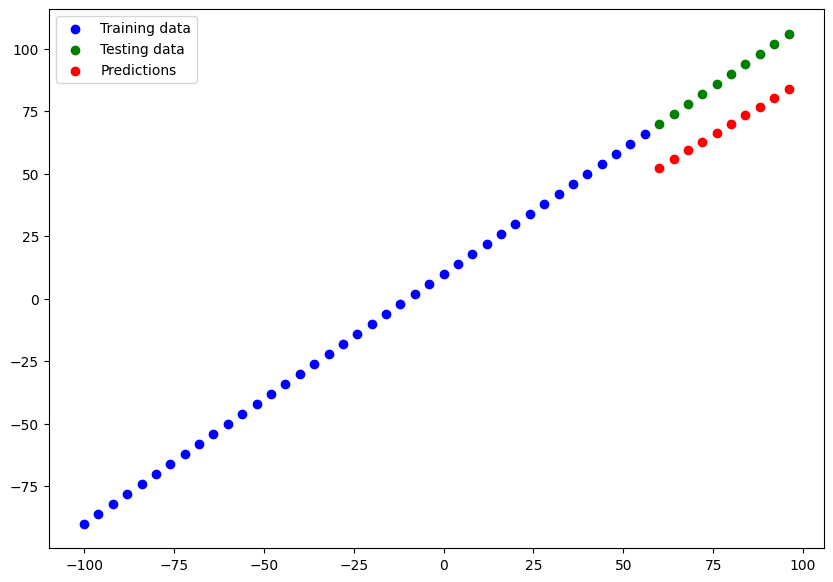

In [123]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)